# How Does a Bike-Share Navigate Speedy Success?


**Project Description**

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes

**Data sources used**

Divvy Data - The data has been processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure).

**Business Task**

How do annual members and casual riders use Cyclistic bikes differently?

Why would casual riders buy Cyclistic annual memberships?

How can Cyclistic use digital media to influence casual riders to become members?

**Summary**
*   Casual riders spent more time in bikes
*   Popular spot is Lake Shore Dr & Monroe St
*   Classic bikes are most rented
*   Docked bikes spent most time cycling
*   Saturday has highest count of rented bikes
*   Member riders love classic and electric bikes but casual riders prefer docked bikes
*   Member riders have been in consistent usage for all days, same for casual riders
*   Member riders spent less time biking than casual riders
*   Majority of time spent riding whole one week is less than 5000 minutes or 83 hours

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Autosaving every 60 seconds


# EDA

In [2]:
df = pd.read_csv("202103-divvy-tripdata.csv",parse_dates=['started_at','ended_at'])

In [3]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228491,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.900960,-87.623777,41.890847,-87.618617,casual
228492,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member
228493,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.900960,-87.623777,41.977997,-87.668047,member
228494,F8F43A0B978A7A35,classic_bike,2021-03-01 18:11:57,2021-03-01 18:18:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228496 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             228496 non-null  object        
 1   rideable_type       228496 non-null  object        
 2   started_at          228496 non-null  datetime64[ns]
 3   ended_at            228496 non-null  datetime64[ns]
 4   start_station_name  213648 non-null  object        
 5   start_station_id    213648 non-null  object        
 6   end_station_name    211769 non-null  object        
 7   end_station_id      211769 non-null  object        
 8   start_lat           228496 non-null  float64       
 9   start_lng           228496 non-null  float64       
 10  end_lat             228329 non-null  float64       
 11  end_lng             228329 non-null  float64       
 12  member_casual       228496 non-null  object        
dtypes: datetime64[ns](2), float64

In [6]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,228496,228496,228496,228496,213648,213648,211769,211769,228496.000000,228496.000000,228329.000000,228329.000000,228496
unique,228496,3,209025,208629,673,673,673,673,NaN,NaN,NaN,NaN,2
top,86808FC559FD1FF6,classic_bike,2021-03-21 13:41:24,2021-03-29 12:32:25,Lake Shore Dr & Monroe St,13300,Lake Shore Dr & Monroe St,13300,NaN,NaN,NaN,NaN,member
freq,1,152545,5,7,2453,2453,2380,2380,NaN,NaN,NaN,NaN,144463
first,NaN,NaN,2021-03-01 00:01:09,2021-03-01 00:06:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-03-31 23:59:08,2021-04-06 11:00:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.901402,-87.644848,41.901734,-87.645036,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044481,0.026351,0.044470,0.026403,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.648501,-87.780000,41.640000,-88.070000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.881032,-87.659141,41.881113,-87.659172,NaN


In [8]:
df["time_diff"] = df['ended_at'] - df['started_at']
df["time_diff"] = df["time_diff"]/np.timedelta64(1,'m') #Convert to minutes
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual,4.066667
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual,10.450000
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual,16.400000
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual,28.983333
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,17.933333


In [10]:
df["weekday"] = df["started_at"].dt.weekday
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,weekday
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual,4.066667,1
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual,10.450000,6
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual,16.400000,3
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual,28.983333,3
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,17.933333,6


# GROUPBY

In [11]:
df.groupby("start_station_name")["ride_id"].count().sort_values()

start_station_name
Commercial Ave & 100th St           1
N Hampden Ct & W Diversey Ave       1
N Damen Ave & W Wabansia St         1
N Carpenter St & W Lake St          1
Ashland Ave & Garfield Blvd         1
                                 ... 
Wells St & Elm St                1660
Millennium Park                  1757
Clark St & Elm St                1935
Streeter Dr & Grand Ave          2074
Lake Shore Dr & Monroe St        2453
Name: ride_id, Length: 673, dtype: int64

In [13]:
df.groupby("end_station_name")["ride_id"].count().sort_values()

end_station_name
Bradley Park                    1
Halsted St & 96th St            1
Halsted St & 69th St            1
Halsted St & 59th St            1
Marshfield Ave & 59th St        1
                             ... 
Michigan Ave & Oak St        1714
Millennium Park              1869
Clark St & Elm St            1924
Streeter Dr & Grand Ave      2039
Lake Shore Dr & Monroe St    2380
Name: ride_id, Length: 673, dtype: int64

In [14]:
df.groupby("rideable_type")["ride_id"].count().sort_values()

rideable_type
docked_bike       15657
electric_bike     60294
classic_bike     152545
Name: ride_id, dtype: int64

In [15]:
df.groupby("member_casual")["ride_id"].count().sort_values()

member_casual
casual     84033
member    144463
Name: ride_id, dtype: int64

In [16]:
df.groupby("start_station_name")["time_diff"].mean().sort_values()

start_station_name
S Wentworth Ave & W 111th St             2.975000
Stewart Ave & 63rd St                    4.283333
State St & 76th St                       5.891667
Eggleston Ave & 69th St                  5.969444
N Sheffield Ave & W Wellington Ave       6.869048
                                         ...     
Dauphin Ave & 103rd St                 413.962500
Karlov Ave & Madison St                546.611111
Ashland Ave & 66th St                  755.541667
Elizabeth St & 92nd St                 968.842308
East End Ave & 87th St                3869.293333
Name: time_diff, Length: 673, dtype: float64

In [17]:
df.groupby("rideable_type")["time_diff"].mean().sort_values()

rideable_type
electric_bike    16.427976
classic_bike     19.377311
docked_bike      81.644887
Name: time_diff, dtype: float64

In [18]:
df.groupby("member_casual")["time_diff"].mean().sort_values()

member_casual
member    13.969955
casual    38.158731
Name: time_diff, dtype: float64

# Drop unwanted features

In [24]:
df.drop(['ride_id','start_station_id','end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'],axis=1,inplace=True)

In [25]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,time_diff,weekday
0,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,Stave St & Armitage Ave,casual,4.066667,1
1,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,Central Park Ave & Bloomingdale Ave,casual,10.450000,6
2,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,Halsted St & 35th St,casual,16.400000,3
3,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,Broadway & Sheridan Rd,casual,28.983333,3
4,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,Chicago Ave & Sheridan Rd,casual,17.933333,6


# Treat Missing Values

In [26]:
df.isnull().sum()

rideable_type             0
started_at                0
ended_at                  0
start_station_name    14848
end_station_name      16727
member_casual             0
time_diff                 0
weekday                   0
dtype: int64

In [27]:
df['start_station_name'] = df['start_station_name'].replace(np.nan,"Missing")

In [28]:
df['end_station_name'] = df['end_station_name'].replace(np.nan,"Missing")

In [29]:
df.isnull().sum()

rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
member_casual         0
time_diff             0
weekday               0
dtype: int64

In [32]:
df.describe()

,time_diff,weekday
count,228496.000000,228496.000000
mean,22.865758,3.082706
std,154.423567,2.099141
min,-0.016667,0.000000
25%,6.833333,1.000000
50%,12.316667,3.000000
75%,23.100000,5.000000
max,31681.650000,6.000000


# Data Visualization

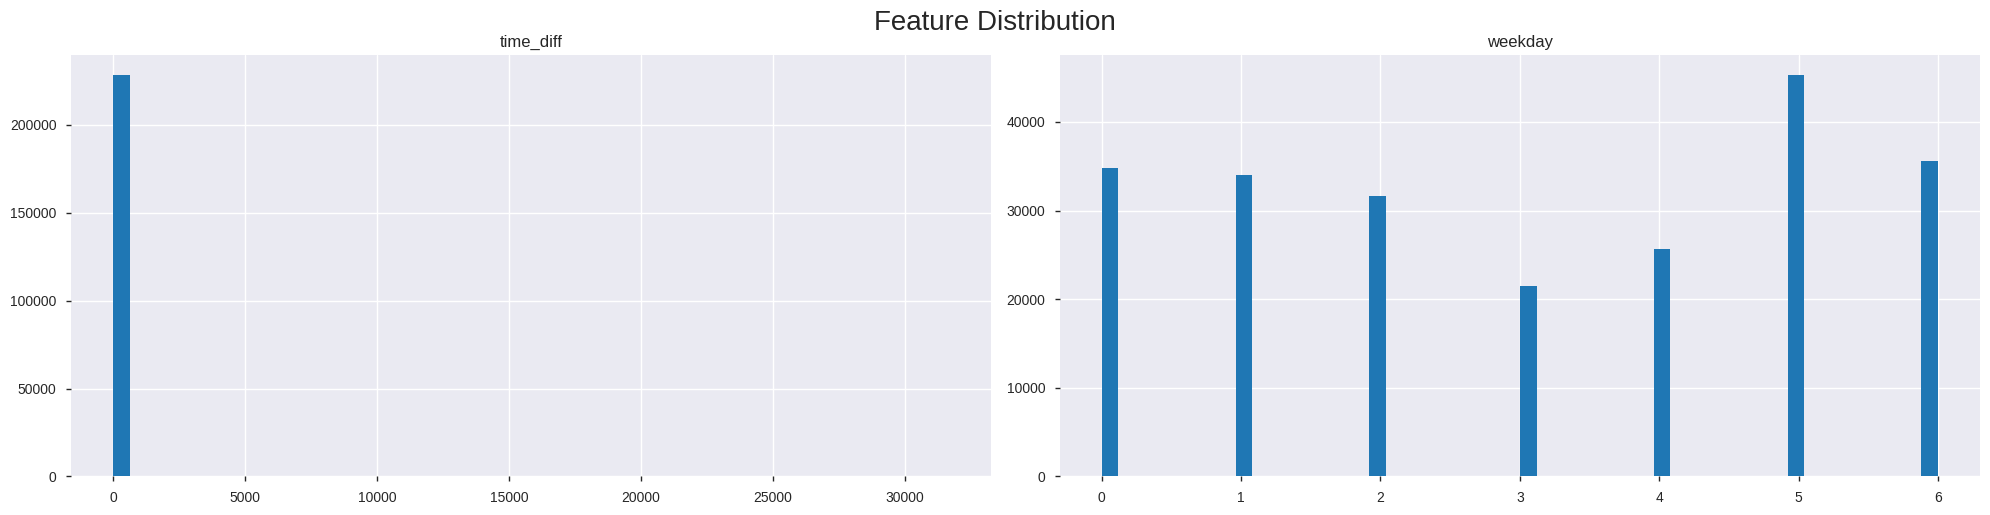

In [33]:
#Unvariate Data Exploration
df.hist(bins=50, figsize=(20,5))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

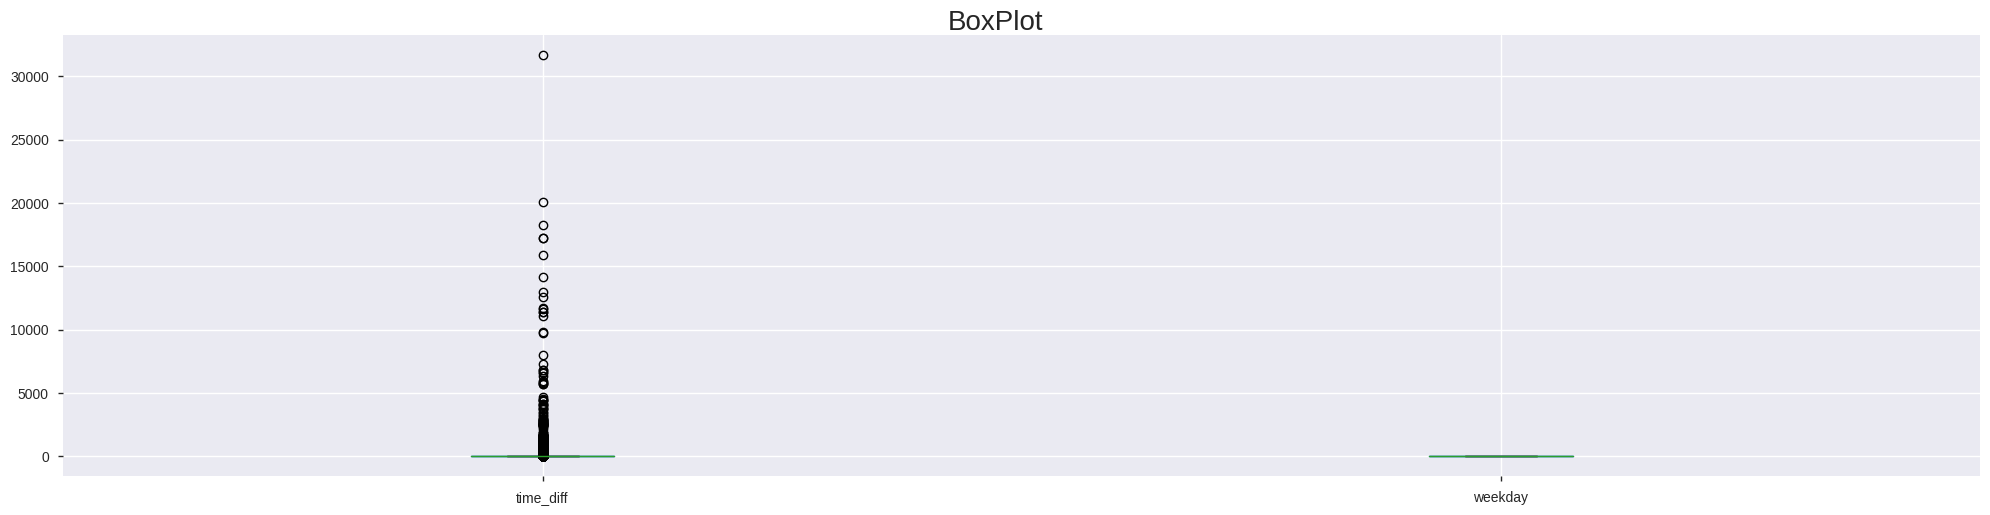

In [34]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

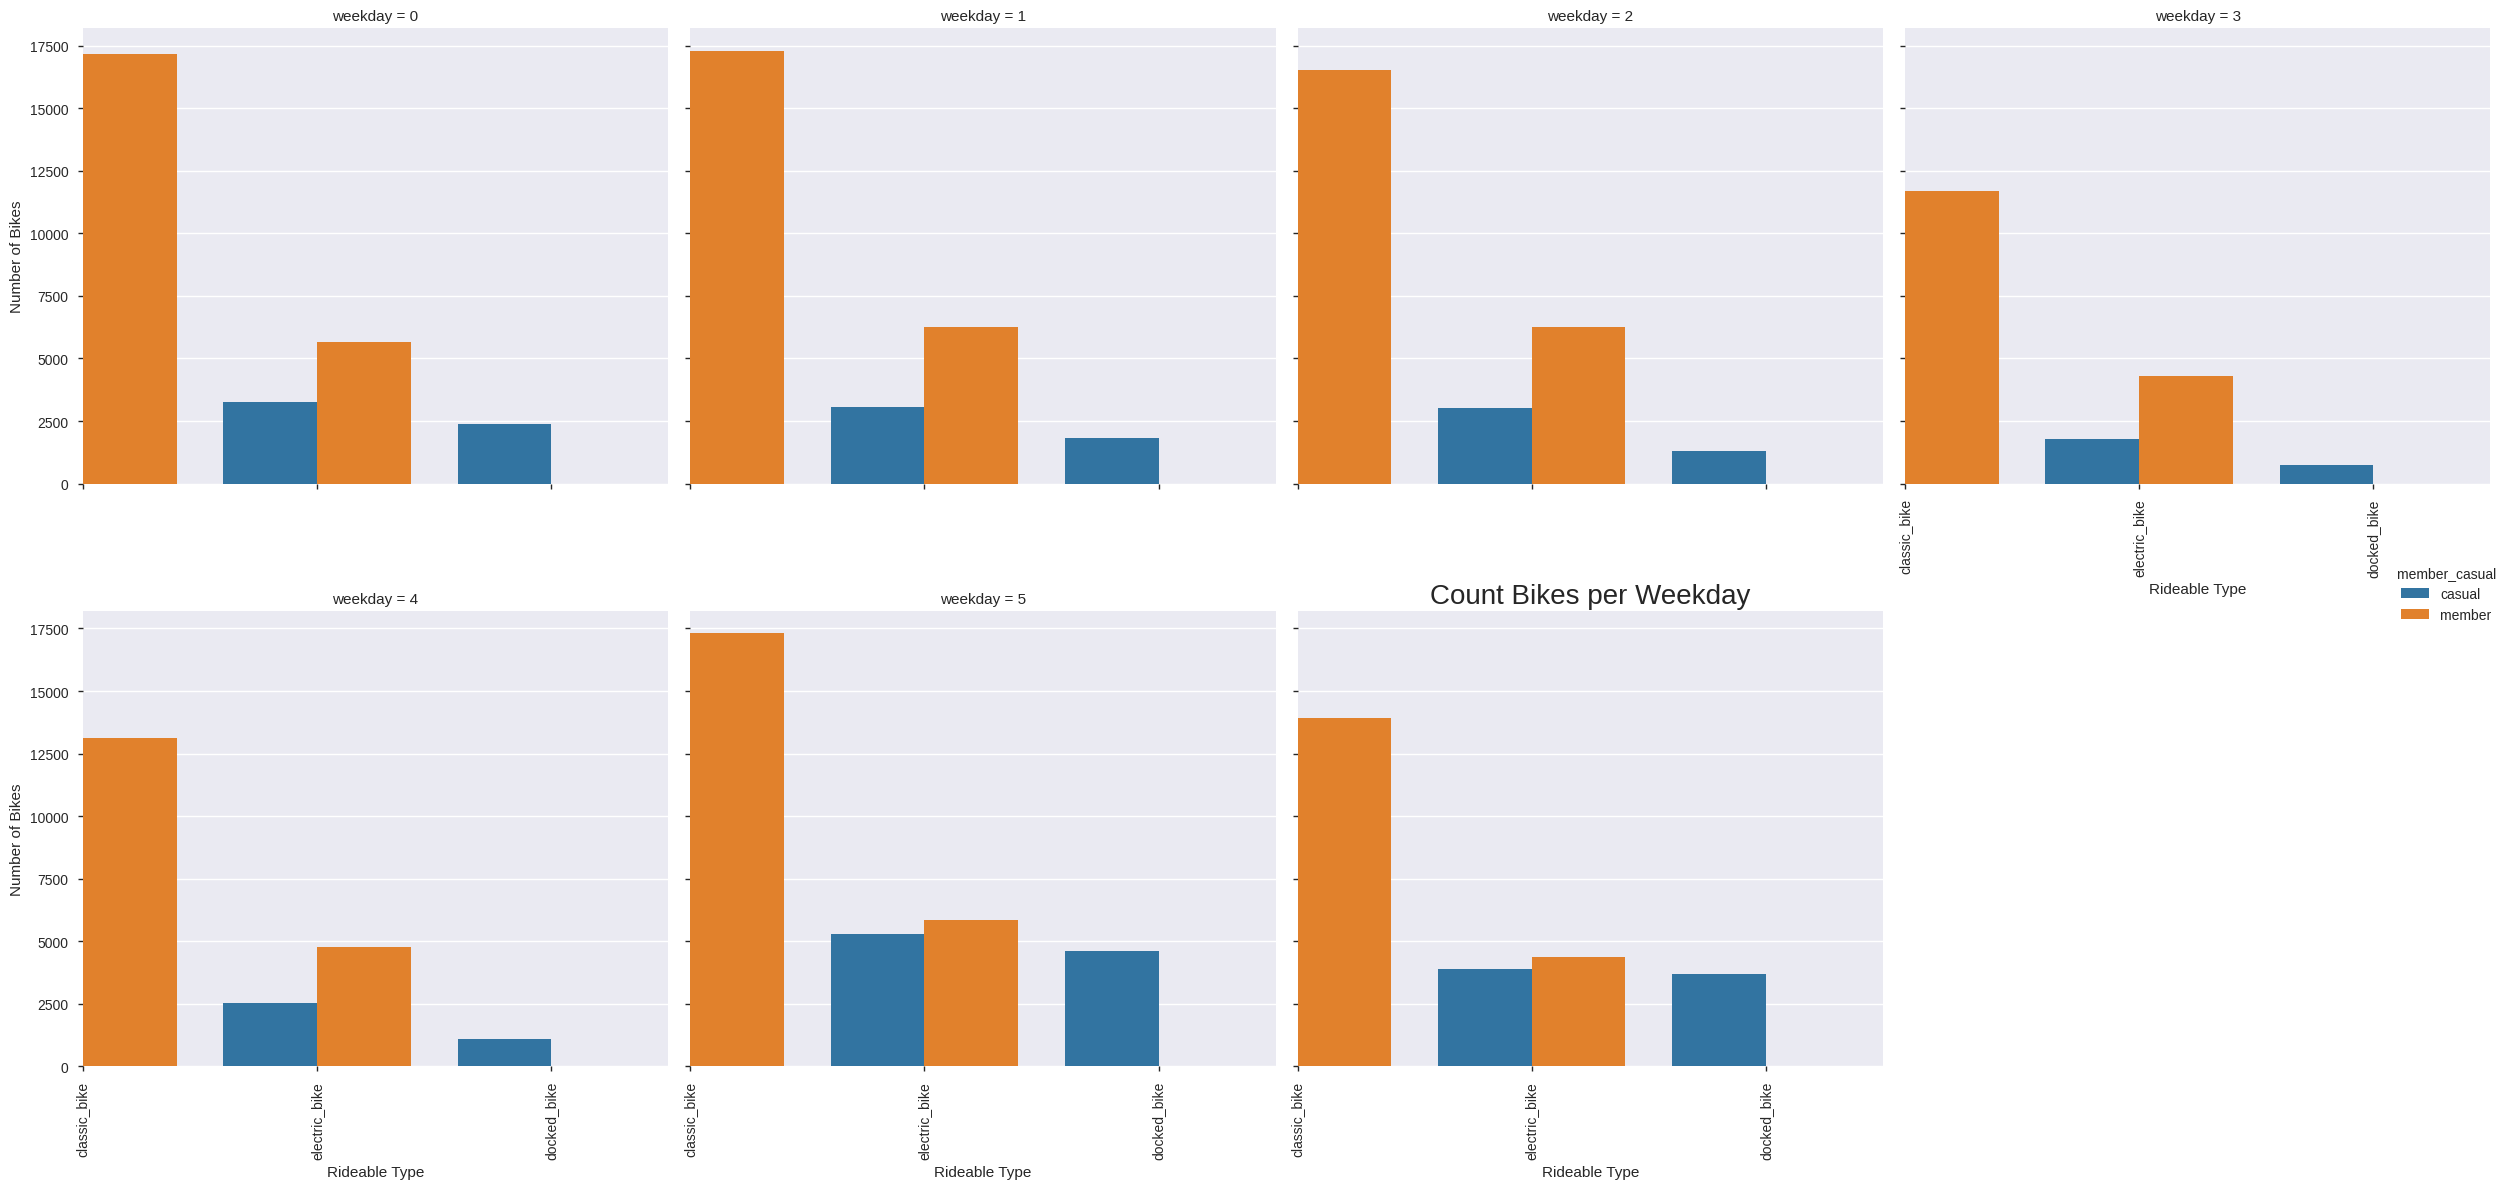

In [35]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='rideable_type', hue='member_casual', col = 'weekday', col_wrap=4,
            kind='count', data=df,
            height = 6, aspect = 1)

g.set_xlabels("Rideable Type")
g.set_ylabels("Number of Bikes")
plt.title("Count Bikes per Weekday", size=20)
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

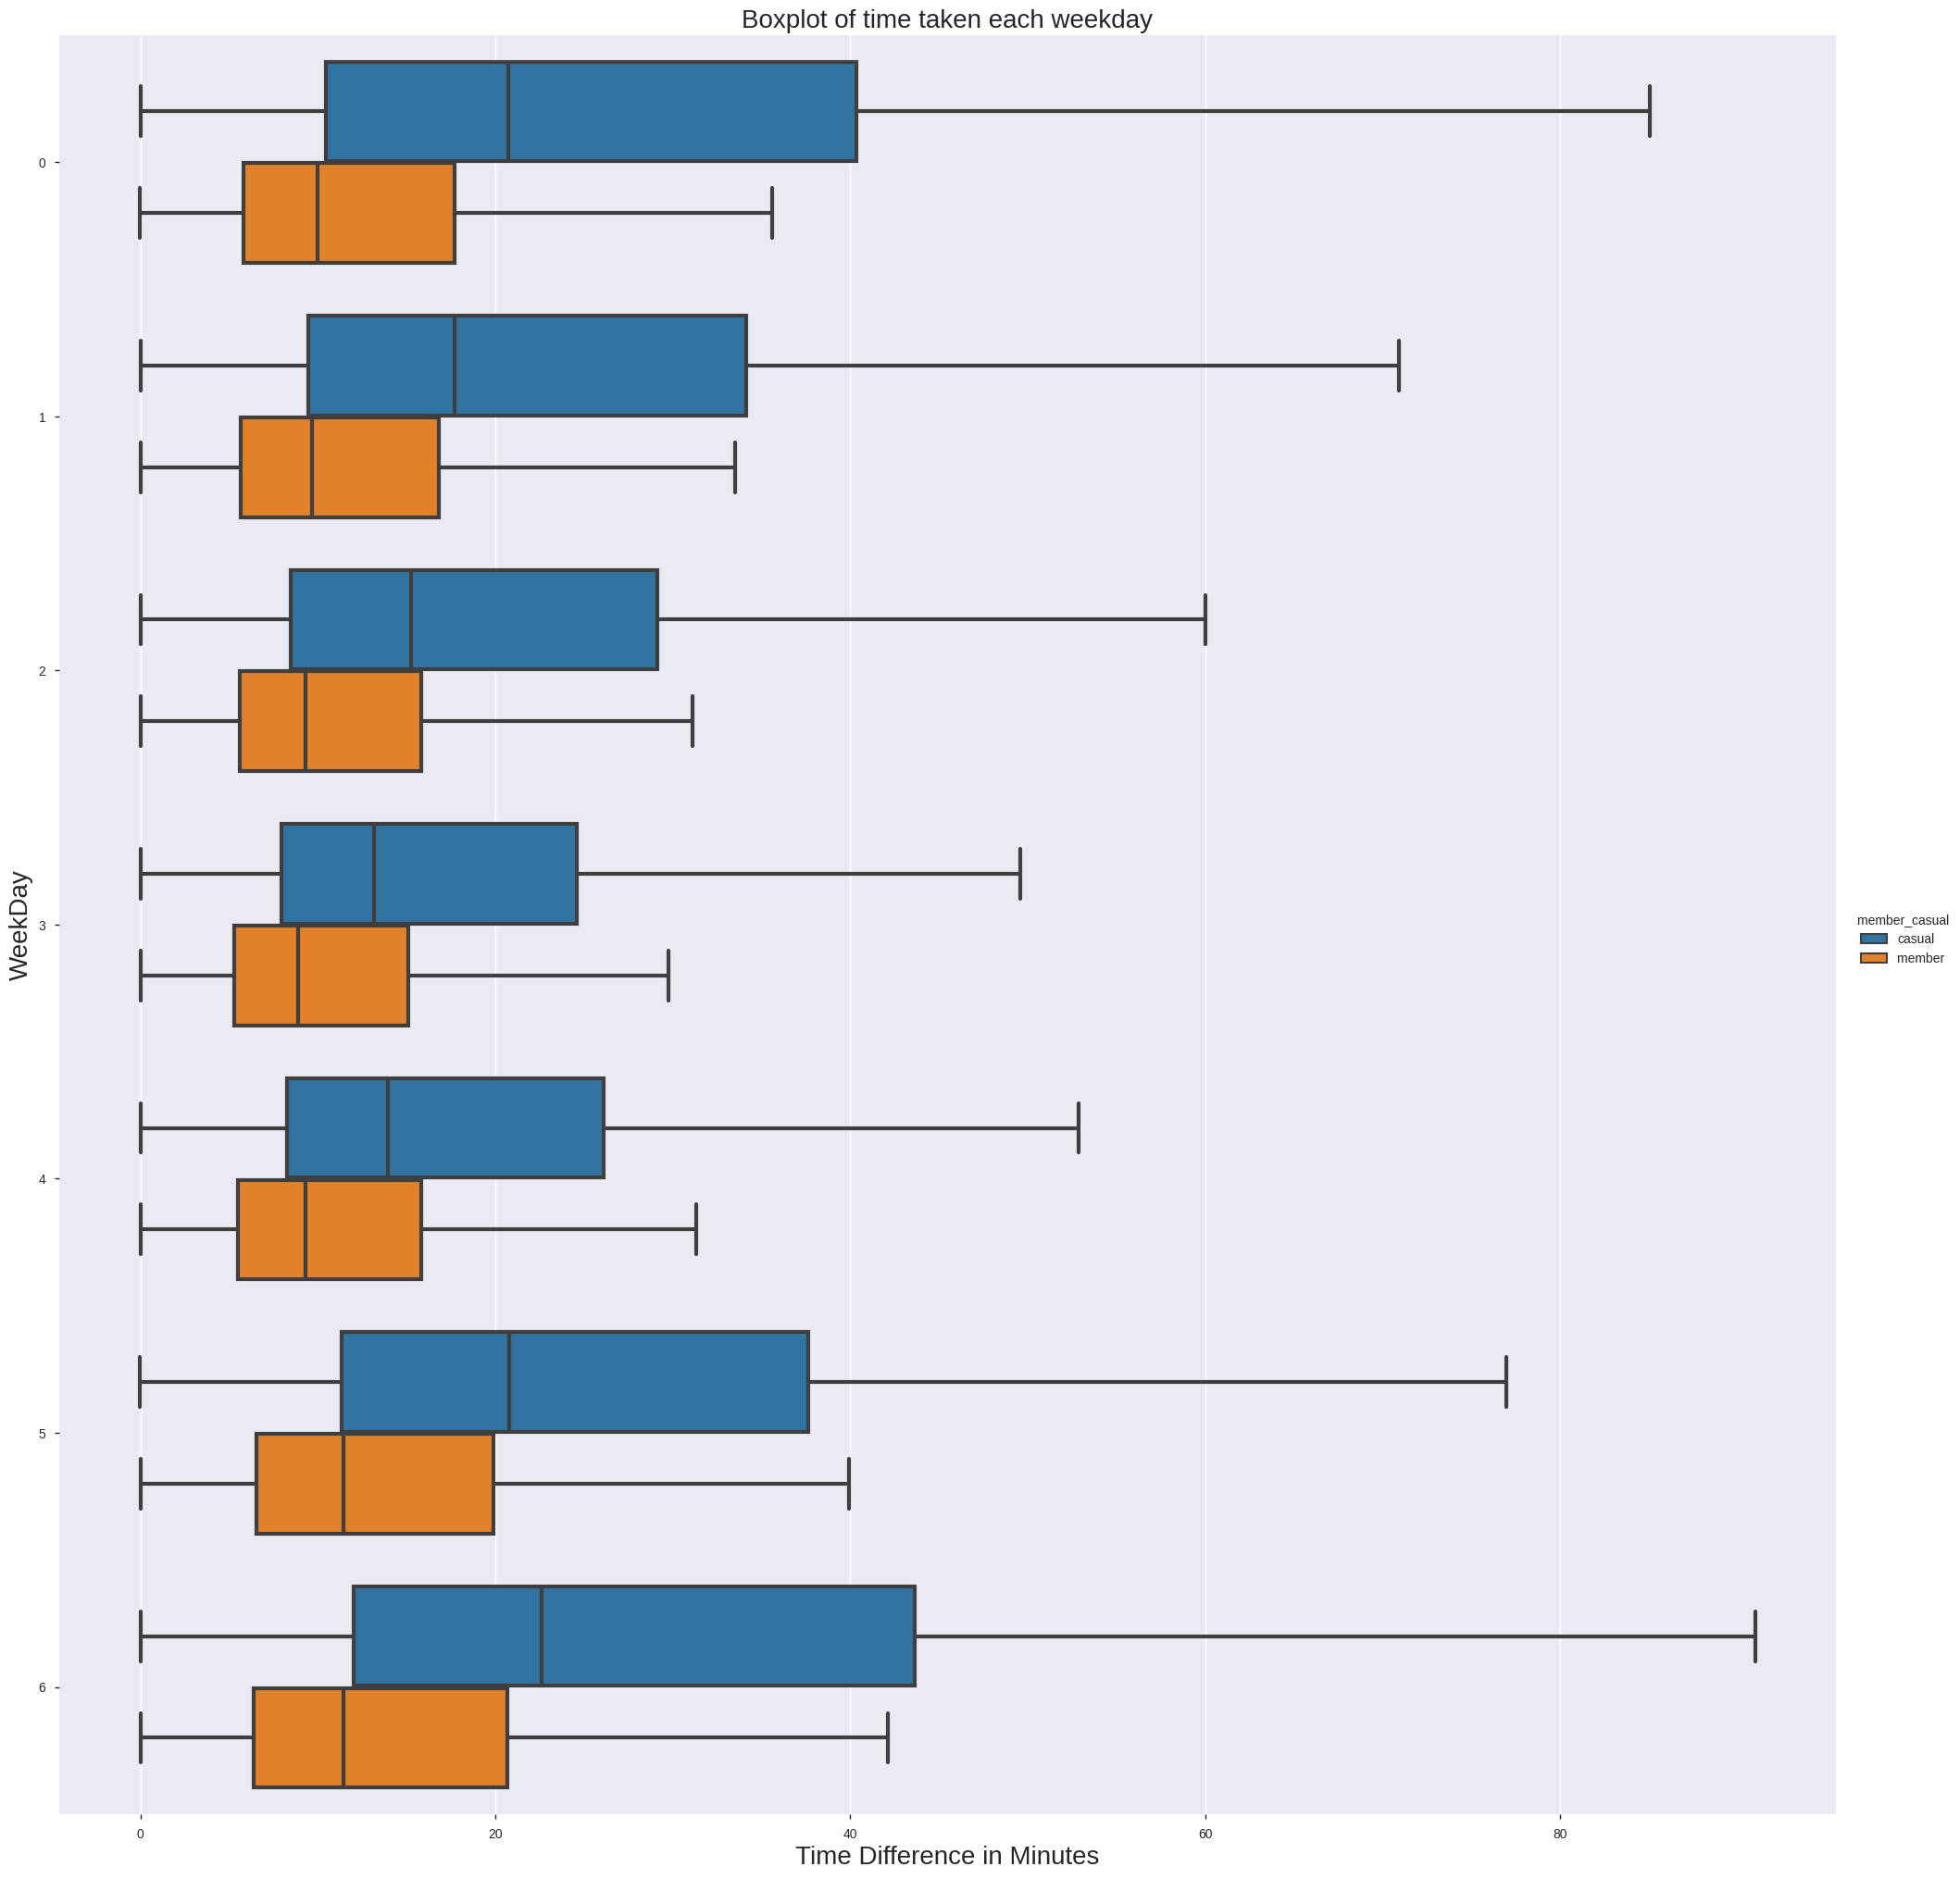

In [36]:
plt.figure(figsize=(20,20))

sns.catplot(x="time_diff", y="weekday",

                hue="member_casual", ci=None,

                data=df, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.xlabel("Time Difference in Minutes", size=20)
plt.ylabel("WeekDay", size=20)

plt.title("Boxplot of time taken each weekday", size=20)

plt.show()

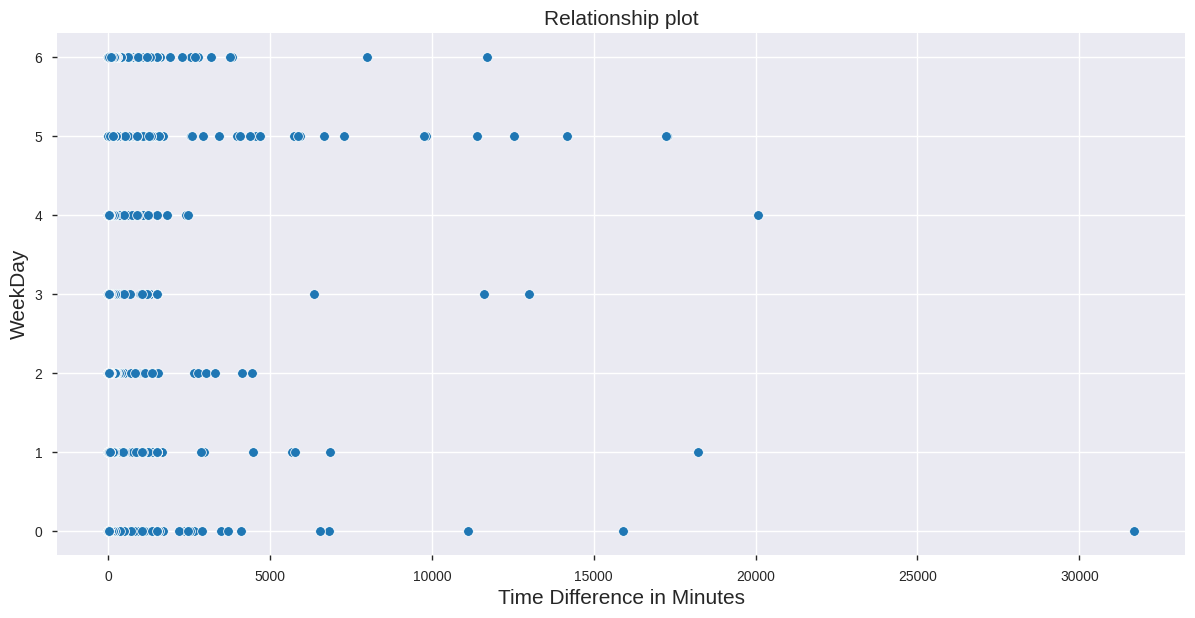

In [37]:
sns.relplot(x="time_diff", y="weekday", data=df, height = 6, aspect = 2)

plt.xlabel("Time Difference in Minutes", size=15)
plt.ylabel("WeekDay", size=15)
plt.title("Relationship plot", size=15)
plt.show()

# Time-Series Analysis

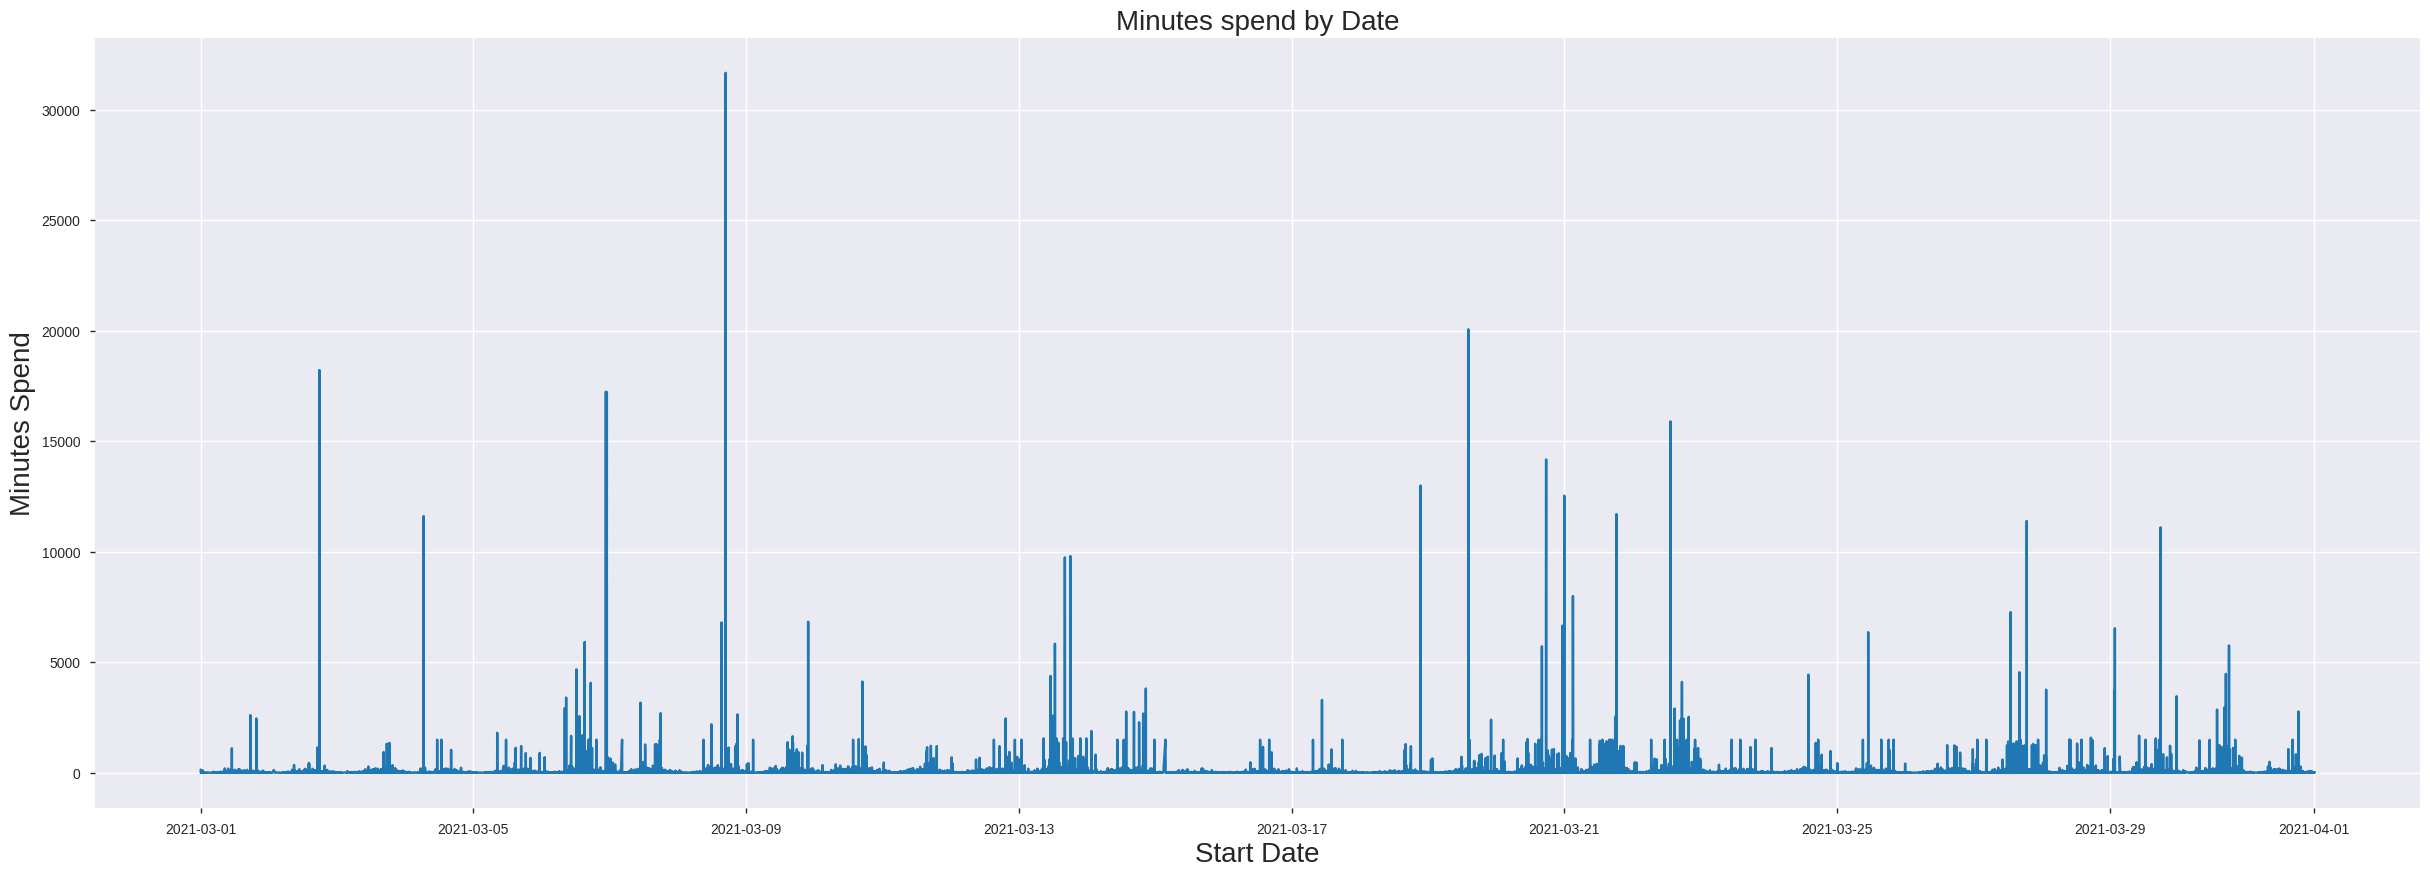

In [38]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.started_at,y=df.time_diff,data=df, estimator=None)
plt.title("Minutes spend by Date", fontsize=20)
plt.xlabel("Start Date", fontsize=20)
plt.ylabel("Minutes Spend", fontsize=20)
plt.show()

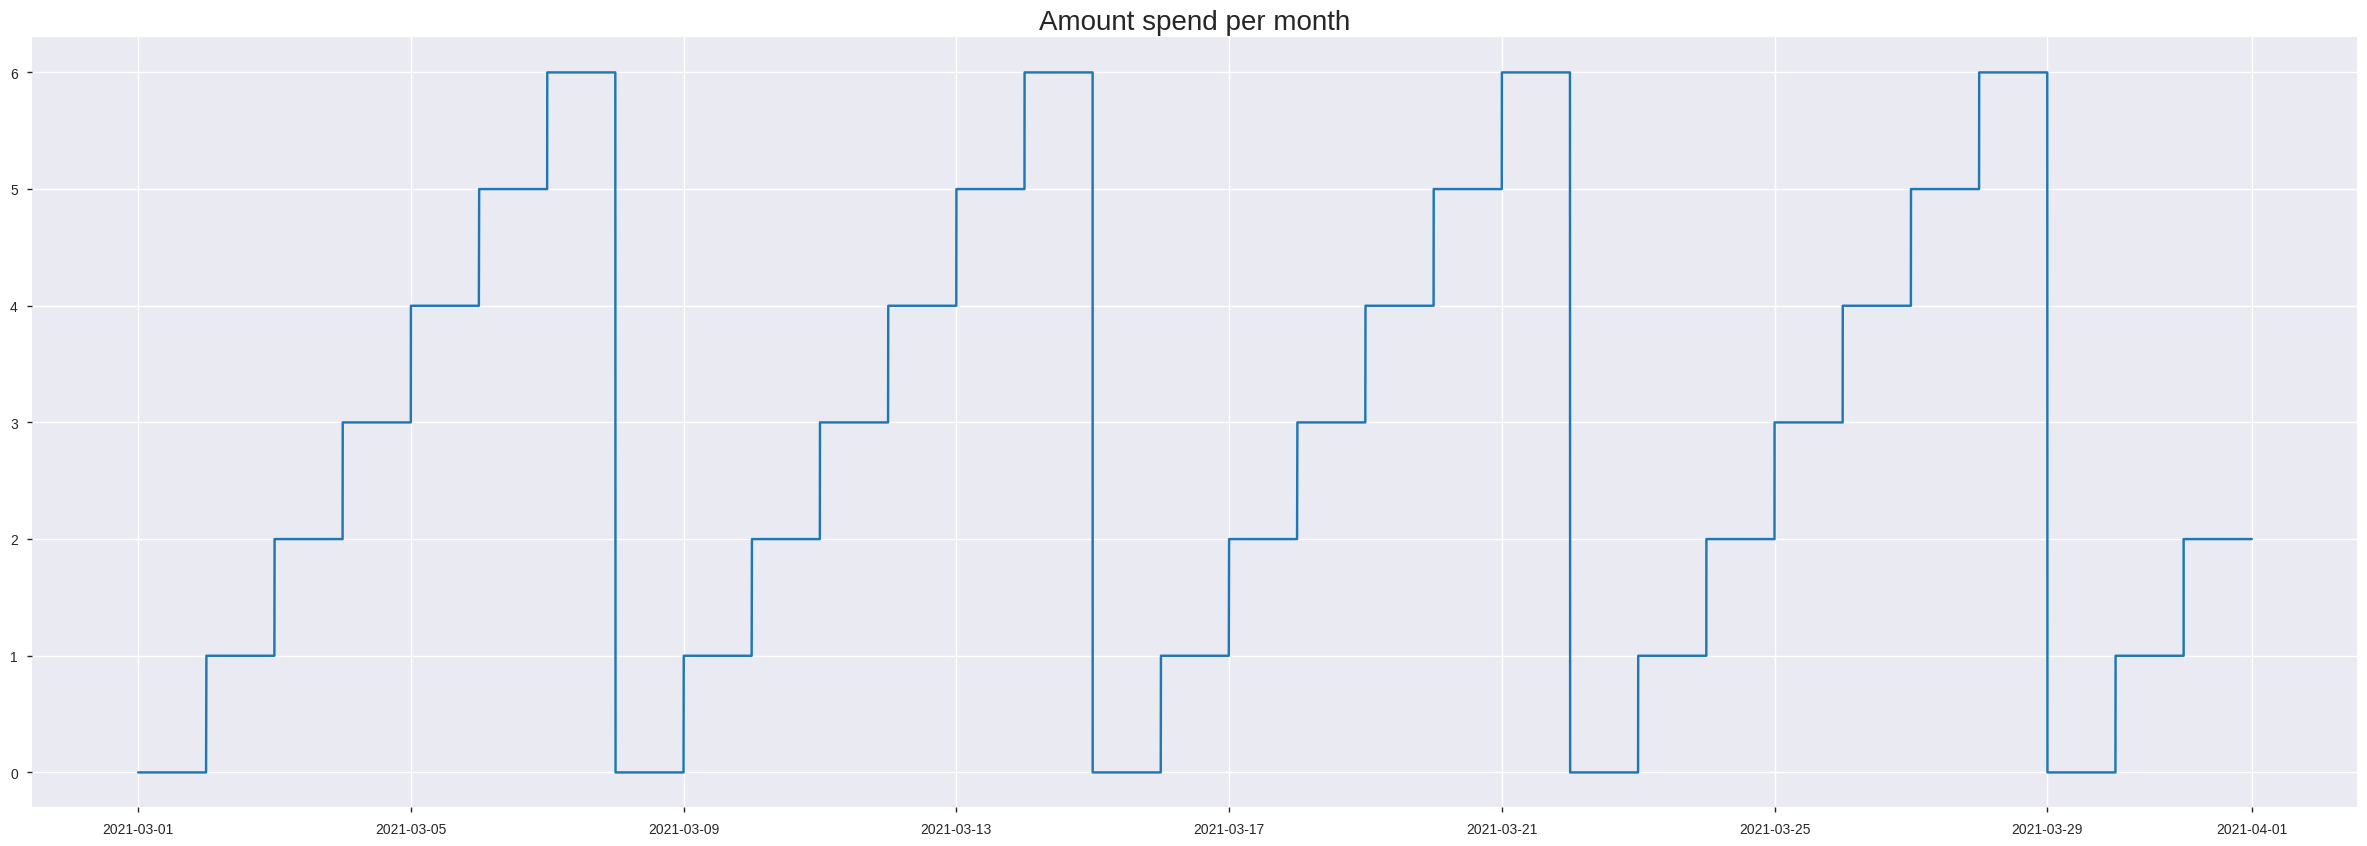

In [39]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.started_at,y=df.weekday, data=df, estimator=None)
plt.title("Amount spend per month", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.show()

# Pairplots

<Figure size 2000x2000 with 0 Axes>

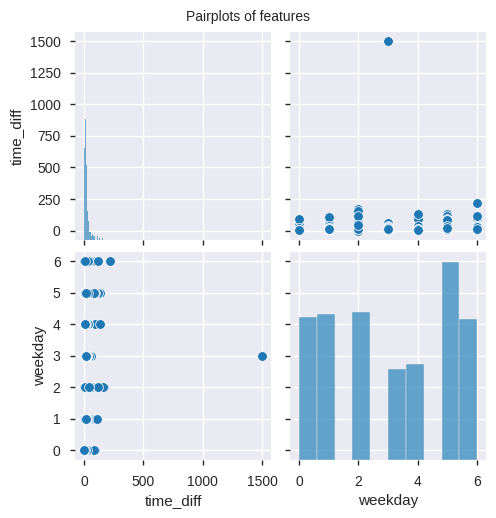

In [40]:
plt.figure(figsize=(20,20))
sns.pairplot(df.sample(500))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=10)
plt.show()

# Correlation

In [41]:
df.corr()

,time_diff,weekday
time_diff,1.00000,0.01582
weekday,0.01582,1.00000


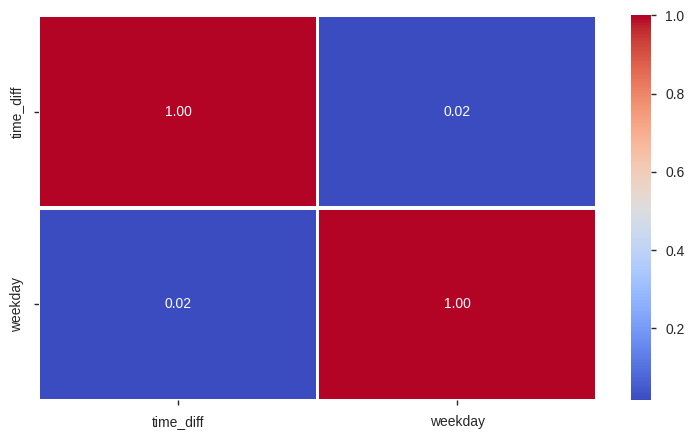

In [42]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()